In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

def load_csv(filepath):
    df = pd.read_csv(filepath)
    df.columns = ['x1', 'x2', 'y']
    df['x0'] = df['x1'].pow(0)
    df['x1^2'] = df['x1'].pow(2)
    df['x2^2'] = df['x2'].pow(2)
    return df

def sigmoid(z):
    return float(1.0 / float((1.0 + math.exp(-1.0 * z))))

def split_data(data, feature_names):
    return data[feature_names].values, data['y'].values

def hypothesis(weights, x):
    z = 0
    for i in range(len(weights)):
        z += x[i] * weights[i]
    return sigmoid(z)

def cross_entropy_error(X, Y, weights):
    sum_errors = 0
    for i in range(len(Y)):
        if Y[i] == 1:
            error = Y[i] * math.log(hypothesis(weights, X[i]))
        else:
            error = (1 - Y[i]) * math.log(1 - hypothesis(weights, X[i]))
        sum_errors += error
    return - 1 / len(Y) * sum_errors

def cross_entropy_derivative(X, Y, weights, j):
    sum_errors = 0
    for i in range(len(Y)):
        sum_errors += (hypothesis(weights, X[i]) - Y[i]) * X[i][j]
    return sum_errors

def update_rule(X, Y, weights, alpha):
    new_weights = []
    error = cross_entropy_error(X, Y, weights)
    for j in range(len(weights)):
        new_weights_value = weights[j] - float(alpha) / float(len(Y)) * cross_entropy_derivative(X, Y, weights, j)
        new_weights.append(new_weights_value)
    return new_weights, error

def logistic_regression(X, Y, alpha, weights, iter):
    cross_entropy_series = []
    for x in range(iter):
        new_weights, error = update_rule(X, Y, weights, alpha)
        weights = new_weights
        cross_entropy_series.append(error)
    return weights, cross_entropy_series

def train(path_train_data, initial_weights, feature_name, alpha, iterations):
    df_train = load_csv(path_train_data)
    X_train, y_train = split_data(df_train, feature_name)
    return logistic_regression(X_train, y_train, alpha, initial_weights, iterations)

def test(path_test_data, trained_weights, feature_name):
    df = load_csv(path_test_data)
    X, Y = split_data(df, feature_name)
    correct_pred = 0
    for i in range(len(X)):
        print("Prediction:", round(hypothesis(trained_weights, X[i]), 3), "\t Target:", Y[i])
        if int(round(hypothesis(trained_weights, X[i]))) == Y[i]:
            correct_pred += 1
    accuracy = correct_pred / len(df)
    return accuracy

def plot_cross_entropy(cross_entropy_series_traindata, cross_entropy_series_testdata, iterations):
    x_values = np.linspace(0, iterations, iterations)
    plt.plot(x_values, cross_entropy_series_traindata, label='Cross-entropy train data')
    plt.plot(x_values, cross_entropy_series_testdata, label='Cross-entropy test data')
    plt.xlabel('Iteration number')
    plt.ylabel('Cross-entropy')
    plt.legend()
    plt.show()

def plot_linear_decision_boundary(filepath_data, trained_weights, iterations):
    df = load_csv(filepath_data)
    admitted = df.loc[df['y'] == 1]
    not_admitted = df.loc[df['y'] == 0]
    x_axes = np.linspace(0, 1, iterations)
    line = - (trained_weights[0] + np.dot(trained_weights[1], x_axes)) / trained_weights[2]
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='y=1')
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='y=0')
    plt.plot(x_axes, line, '-r', label='Decision boundary')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

def plot_radial_decision_boundary(filepath_data, trained_weights, iterations):
    df = load_csv(filepath_data)
    admitted = df.loc[df['y'] == 1]
    not_admitted = df.loc[df['y'] == 0]
    x = np.linspace(0, 1, 1000)
    y = np.linspace(0, 1, 1000)
    xx, yy = np.meshgrid(x, y)
    z = np.zeros((1000, 1000))

    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            val = np.dot([1, xx[i, j], yy[i, j], np.square(xx[i, j]), np.square(yy[i, j])], trained_weights)
            if val < 0:
                z[i, j] = 1

    plt.contour(xx, yy, z, [1])
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='y=1')
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='y=0')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

## Task 4 

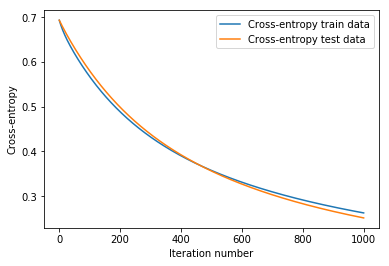

Prediction: 0.195 	 Target: 0.0
Prediction: 0.259 	 Target: 0.0
Prediction: 0.657 	 Target: 1.0
Prediction: 0.424 	 Target: 0.0
Prediction: 0.608 	 Target: 1.0
Prediction: 0.646 	 Target: 1.0
Prediction: 0.805 	 Target: 1.0
Prediction: 0.75 	 Target: 1.0
Prediction: 0.407 	 Target: 0.0
Prediction: 0.362 	 Target: 0.0
Prediction: 0.752 	 Target: 1.0
Prediction: 0.376 	 Target: 0.0
Prediction: 0.715 	 Target: 1.0
Prediction: 0.185 	 Target: 0.0
Prediction: 0.523 	 Target: 1.0
Prediction: 0.929 	 Target: 1.0
Prediction: 0.047 	 Target: 0.0
Prediction: 0.264 	 Target: 0.0
Prediction: 0.946 	 Target: 1.0
Prediction: 0.086 	 Target: 0.0
Prediction: 0.516 	 Target: 1.0
Prediction: 0.781 	 Target: 1.0
Prediction: 0.056 	 Target: 0.0
Prediction: 0.922 	 Target: 1.0
Prediction: 0.882 	 Target: 1.0
Prediction: 0.868 	 Target: 1.0
Prediction: 0.918 	 Target: 1.0
Prediction: 0.328 	 Target: 0.0
Prediction: 0.056 	 Target: 0.0
Prediction: 0.787 	 Target: 1.0
Prediction: 0.366 	 Target: 0.0
Predictio

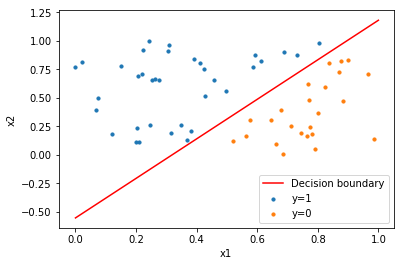

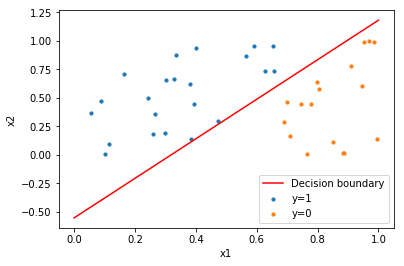

In [3]:
# Parameters
path_train_data = 'dataset/classification/cl_train_1.csv'
path_test_data = 'dataset/classification/cl_test_1.csv'
initial_weights = [0, 0, 0]
alpha = 0.1
iterations = 1000
feature_name = ['x0', 'x1', 'x2']

# Train weights
trained_weights_train_data, cross_entropy_train_data = train(path_train_data, initial_weights, feature_name, alpha, iterations)
trained_weights_test_data, cross_entropy_test_data = train(path_test_data, initial_weights, feature_name, alpha, iterations)

# Plot cross-entropy
plot_cross_entropy(cross_entropy_train_data, cross_entropy_test_data, iterations)

# Test precision
accuracy = test(path_test_data, trained_weights_train_data, feature_name)
print("Accuracy:", accuracy)

# Plot decision boundary
plot_linear_decision_boundary(path_train_data, trained_weights_train_data, iterations)
plot_linear_decision_boundary(path_test_data, trained_weights_train_data, iterations)

## Task 5

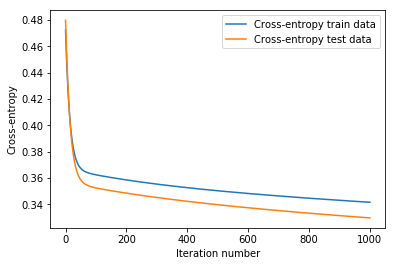

Prediction: 0.71 	 Target: 1.0
Prediction: 0.699 	 Target: 1.0
Prediction: 0.754 	 Target: 1.0
Prediction: 0.307 	 Target: 0.0
Prediction: 0.715 	 Target: 1.0
Prediction: 0.731 	 Target: 1.0
Prediction: 0.374 	 Target: 0.0
Prediction: 0.21 	 Target: 0.0
Prediction: 0.641 	 Target: 1.0
Prediction: 0.756 	 Target: 1.0
Prediction: 0.321 	 Target: 0.0
Prediction: 0.748 	 Target: 1.0
Prediction: 0.706 	 Target: 1.0
Prediction: 0.242 	 Target: 0.0
Prediction: 0.275 	 Target: 0.0
Prediction: 0.296 	 Target: 0.0
Prediction: 0.721 	 Target: 1.0
Prediction: 0.414 	 Target: 0.0
Prediction: 0.741 	 Target: 1.0
Prediction: 0.682 	 Target: 1.0
Prediction: 0.267 	 Target: 0.0
Prediction: 0.726 	 Target: 1.0
Prediction: 0.257 	 Target: 0.0
Prediction: 0.686 	 Target: 1.0
Prediction: 0.742 	 Target: 1.0
Prediction: 0.299 	 Target: 0.0
Prediction: 0.73 	 Target: 1.0
Prediction: 0.709 	 Target: 1.0
Prediction: 0.323 	 Target: 0.0
Prediction: 0.329 	 Target: 0.0
Prediction: 0.268 	 Target: 0.0
Prediction:

/Users/bendiknordeng/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


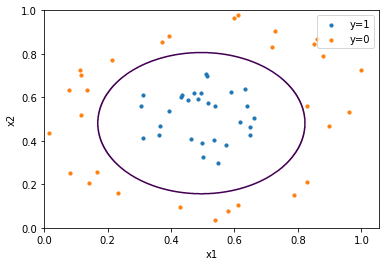

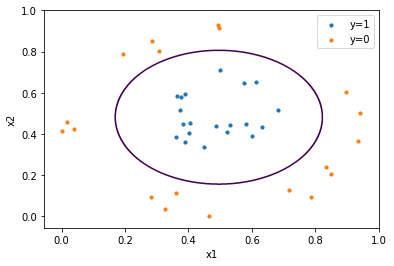

[-3.9193222025091092, 10.42809795869914, 10.690241523966302, -10.93296296560407, -10.791222948555195]


In [4]:
# Parameters
path_train_data = 'dataset/classification/cl_train_2.csv'
path_test_data = 'dataset/classification/cl_test_2.csv'
initial_weights = [-5, 10, 10, -10, -10]
alpha = 0.1
iterations = 1000
feature_name = ['x0', 'x1', 'x2', 'x1^2', 'x2^2']

# Train weights
trained_weights_train_data, cross_entropy_train_data = train(path_train_data, initial_weights, feature_name, alpha, iterations)
trained_weights_test_data, cross_entropy_test_data = train(path_test_data, initial_weights, feature_name, alpha, iterations)

# Plot cross-entropy
plot_cross_entropy(cross_entropy_train_data, cross_entropy_test_data, iterations)

# Test precision
accuracy = test(path_test_data, trained_weights_train_data, feature_name)
print("Accuracy:", accuracy)

# Plot decision boundary
plot_radial_decision_boundary(path_train_data, trained_weights_train_data, iterations)
plot_radial_decision_boundary(path_test_data, trained_weights_train_data, iterations)
print(trained_weights_test_data)